Clés disponibles dans le fichier npz : KeysView(NpzFile 'vecteurs_caracteristiques_test.npz' with keys: ENGINE BLOCK, INSTRUMENT CLUSTER, RADIO, VACUUM BRAKE BOOSTER, FUSE BOX...)


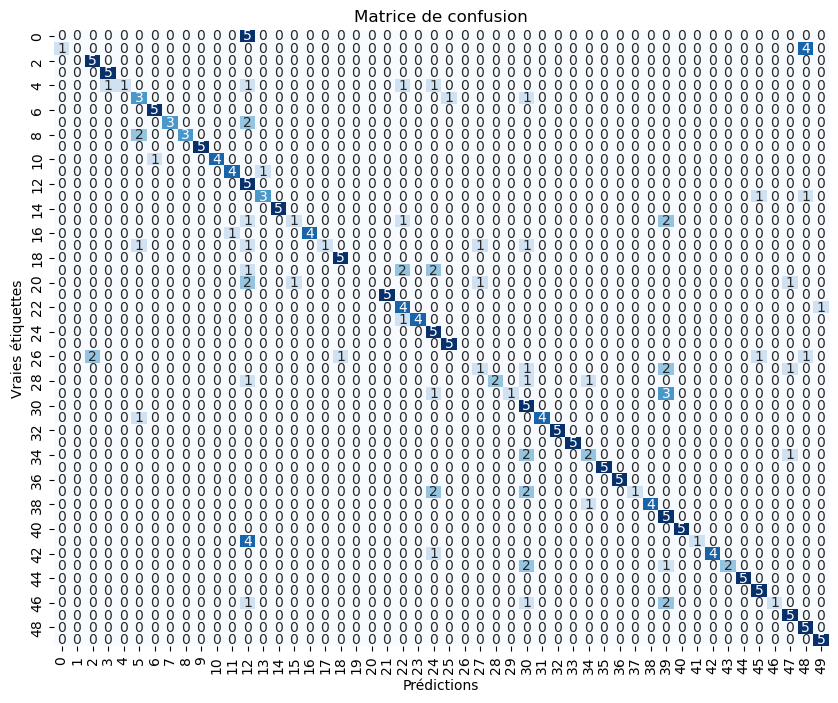

In [1]:
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le modèle SVM à partir du fichier
modele_svm = joblib.load('modele_svm.pkl')

# Charger les données de test
donnees_test = np.load('vecteurs_caracteristiques_test.npz')

# Afficher les clés disponibles dans le fichier npz
print("Clés disponibles dans le fichier npz :", donnees_test.keys())

# Extraire les vecteurs de caractéristiques de test et les étiquettes
vecteurs_caracteristiques_test = []
etiquettes_test = []

for classe in donnees_test.keys():
    if classe != 'arr_0':  # Exclure la clé 'arr_0' qui n'est pas utilisée
        vecteurs_caracteristiques_test.extend(donnees_test[classe])
        etiquettes_test.extend([classe] * donnees_test[classe].shape[0])

# Convertir en tableaux numpy
vecteurs_caracteristiques_test = np.array(vecteurs_caracteristiques_test)
etiquettes_test = np.array(etiquettes_test)

# Faire des prédictions sur les données de test
predictions_test = modele_svm.predict(vecteurs_caracteristiques_test)

# Créer la matrice de confusion
matrice_confusion = confusion_matrix(etiquettes_test, predictions_test)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import joblib  # Si vous utilisez joblib pour sauvegarder le modèle SVM

# Charger le modèle CNN pré-entraîné (par exemple, VGG16)
model = VGG16(weights='imagenet', include_top=False)

# Charger le modèle SVM entraîné
modele_svm = joblib.load('modele_svm.pkl')

# Charger et prétraiter la nouvelle image
img_path = 'spoiler.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Adapter à la taille d'entrée de votre modèle CNN
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Prétraiter l'image pour l'adapter au modèle CNN

# Extraire les caractéristiques de l'image en utilisant le modèle CNN pré-entraîné (par exemple, VGG16)
features = model.predict(x)

# Aplatir les caractéristiques de l'image
features_flattened = features.flatten()

# Faire une prédiction en utilisant le modèle SVM
prediction = modele_svm.predict(features_flattened.reshape(1, -1))


# Afficher la prédiction
print("La prédiction pour la nouvelle image est :", prediction)


In [9]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import joblib

# Charger le modèle CNN pré-entraîné (par exemple, VGG16)
model = VGG16(weights='imagenet', include_top=False)

# Charger le modèle SVM entraîné
modele_svm = joblib.load('modele_svm.pkl')

# Fonction pour effectuer la prédiction lorsque le bouton est cliqué
def predict_image():
    # Ouvrir une boîte de dialogue pour sélectionner l'image
    file_path = filedialog.askopenfilename()
    
    # Charger et prétraiter l'image sélectionnée
    img = image.load_img(file_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Extraire les caractéristiques de l'image en utilisant le modèle CNN pré-entraîné
    features = model.predict(x)
    features_flattened = features.flatten()
    
    # Faire une prédiction en utilisant le modèle SVM
    prediction = modele_svm.predict(features_flattened.reshape(1, -1))
    
    # Afficher la prédiction dans une boîte de dialogue
    messagebox.showinfo("Résultat de la prédiction", f"La prédiction pour l'image est : {prediction}")

# Créer la fenêtre principale
root = tk.Tk()
root.title("Interface de prédiction d'image")

# Ajouter un bouton pour sélectionner l'image
select_button = tk.Button(root, text="Sélectionner une image", command=predict_image)
select_button.pack(pady=20)

# Exécuter la boucle principale de l'interface graphique
root.mainloop()


In [12]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import joblib

# Charger le modèle CNN pré-entraîné (par exemple, VGG16)
model = VGG16(weights='imagenet', include_top=False)

# Charger le modèle SVM entraîné
modele_svm = joblib.load('modele_svm.pkl')

# Fonction pour effectuer la prédiction lorsque le bouton est cliqué
def predict_image():
    # Ouvrir une boîte de dialogue pour sélectionner l'image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Charger et prétraiter l'image sélectionnée
        pil_image = Image.open(file_path)
        pil_image = pil_image.resize((224, 224))  # Redimensionner l'image pour correspondre aux attentes de VGG16
        
        # Convertir l'image en objet ImageTk pour l'affichage dans Tkinter
        img = ImageTk.PhotoImage(pil_image)
        image_label.config(image=img)
        image_label.image = img  # Garder une référence à l'objet ImageTk pour éviter la collecte par le garbage collector
        
        img_array = image.img_to_array(pil_image)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Extraire les caractéristiques de l'image en utilisant le modèle CNN pré-entraîné
        features = model.predict(img_array)
        features_flattened = features.flatten()
        
        # Faire une prédiction en utilisant le modèle SVM
        prediction = modele_svm.predict(features_flattened.reshape(1, -1))
        
        # Afficher la prédiction dans une étiquette
        prediction_label.config(text=f"Prédiction : {prediction[0]}")
    else:
        messagebox.showwarning("Avertissement", "Aucune image sélectionnée.")

# Créer la fenêtre principale
root = tk.Tk()
root.title("Interface de prédiction d'image")
root.geometry("500x400")  # Définir la taille de la fenêtre

# Créer un conteneur pour les widgets
main_frame = tk.Frame(root, bg="white")
main_frame.pack(expand=True, fill="both")

# Créer un cadre pour l'image
image_frame = tk.Frame(main_frame, bg="white", bd=5)
image_frame.pack(pady=20)

# Ajouter une étiquette pour afficher l'image sélectionnée
image_label = tk.Label(image_frame, bg="white")
image_label.pack()

# Créer un cadre pour les résultats
result_frame = tk.Frame(main_frame, bg="white")
result_frame.pack()

# Ajouter une étiquette pour afficher la prédiction
prediction_label = tk.Label(result_frame, text="Prédiction : ", bg="white", font=("Helvetica", 14))
prediction_label.pack(pady=10)

# Ajouter un bouton pour sélectionner l'image
select_button = tk.Button(root, text="Sélectionner une image", command=predict_image, bg="#4CAF50", fg="white", font=("Helvetica", 12))
select_button.pack(pady=10)

# Exécuter la boucle principale de l'interface graphique
root.mainloop()


In [31]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import joblib

# Charger le modèle CNN pré-entraîné (par exemple, VGG16)
model = VGG16(weights='imagenet', include_top=False)

# Charger le modèle SVM entraîné
modele_svm = joblib.load('modele_svm.pkl')

# Variable pour stocker la prédiction
prediction_text = ""

# Fonction pour effectuer la prédiction lorsque le bouton est cliqué
def predict_image():
    global prediction_text
    
    # Ouvrir une boîte de dialogue pour sélectionner l'image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Charger et prétraiter l'image sélectionnée
        pil_image = Image.open(file_path)
        pil_image = pil_image.resize((224, 224))  # Redimensionner l'image pour correspondre aux attentes de VGG16
        
        # Convertir l'image en objet ImageTk pour l'affichage dans Tkinter
        img = ImageTk.PhotoImage(pil_image)
        image_label.config(image=img)
        image_label.image = img  # Garder une référence à l'objet ImageTk pour éviter la collecte par le garbage collector
        
        img_array = image.img_to_array(pil_image)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Extraire les caractéristiques de l'image en utilisant le modèle CNN pré-entraîné
        features = model.predict(img_array)
        features_flattened = features.flatten()
        
        # Faire une prédiction en utilisant le modèle SVM
        prediction = modele_svm.predict(features_flattened.reshape(1, -1))
        
        # Mettre à jour le texte de la prédiction
        prediction_text = f"Prédiction : {prediction[0]}"
        
        # Afficher la prédiction dans une étiquette
        prediction_label.config(text=prediction_text)
    else:
        messagebox.showwarning("Avertissement", "Aucune image sélectionnée.")

# Créer la fenêtre principale
root = tk.Tk()
root.title("Interface de prédiction d'image")
root.geometry("500x400")  # Définir la taille de la fenêtre

# Créer un conteneur pour les widgets
main_frame = tk.Frame(root, bg="white")
main_frame.pack(expand=True, fill="both")

# Créer un cadre pour l'image
image_frame = tk.Frame(main_frame, bg="white", bd=5)
image_frame.pack(pady=20)

# Ajouter une étiquette pour afficher l'image sélectionnée
image_label = tk.Label(image_frame, bg="white")
image_label.pack()

# Créer un cadre pour les résultats
result_frame = tk.Frame(main_frame, bg="white")
result_frame.pack()

# Ajouter une étiquette pour afficher la prédiction
prediction_label = tk.Label(result_frame, text=prediction_text, bg="white", font=("Helvetica", 14))
prediction_label.pack(pady=10)

# Ajouter un bouton pour sélectionner l'image
select_button = tk.Button(root, text="Sélectionner une image", command=predict_image, bg="#4CAF50", fg="white", font=("Helvetica", 12))
select_button.pack(pady=10)

# Exécuter la boucle principale de l'interface graphique
root.mainloop()


In [34]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import joblib

# Charger le modèle CNN pré-entraîné (par exemple, VGG16)
model = VGG16(weights='imagenet', include_top=False)

# Charger le modèle SVM entraîné
modele_svm = joblib.load('modele_svm.pkl')

# Variable pour stocker la prédiction
prediction_text = ""

# Fonction pour effectuer la prédiction lorsque le bouton est cliqué
def predict_image():
    global prediction_text
    
    # Ouvrir une boîte de dialogue pour sélectionner l'image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Charger et prétraiter l'image sélectionnée
        pil_image = Image.open(file_path)
        pil_image = pil_image.resize((224, 224))  # Redimensionner l'image pour correspondre aux attentes de VGG16
        
        # Convertir l'image en objet ImageTk pour l'affichage dans Tkinter
        img = ImageTk.PhotoImage(pil_image)
        image_label.config(image=img)
        image_label.image = img  # Garder une référence à l'objet ImageTk pour éviter la collecte par le garbage collector
        
        img_array = image.img_to_array(pil_image)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Extraire les caractéristiques de l'image en utilisant le modèle CNN pré-entraîné
        features = model.predict(img_array)
        features_flattened = features.flatten()
        
        # Faire une prédiction en utilisant le modèle SVM
        prediction = modele_svm.predict(features_flattened.reshape(1, -1))
        
        # Mettre à jour le texte de la prédiction
        prediction_text = f"Prédiction : {prediction[0]}"
        
        # Afficher la prédiction dans une étiquette
        prediction_label.config(text=prediction_text)
    else:
        messagebox.showwarning("Avertissement", "Aucune image sélectionnée.")

# Créer la fenêtre principale
root = tk.Tk()
root.title("Interface de prédiction d'image")
root.geometry("600x450")  # Définir la taille de la fenêtre

# Style de police
font_style = ("Helvetica", 14)

# Couleurs
bg_color = "#f0f0f0"
btn_color = "#4CAF50"

# Créer un cadre principal avec un fond de couleur
main_frame = tk.Frame(root, bg=bg_color)
main_frame.pack(expand=True, fill="both")

# Créer un cadre pour l'image
image_frame = tk.Frame(main_frame, bg=bg_color, bd=5)
image_frame.pack(pady=20)

# Ajouter une étiquette pour afficher l'image sélectionnée
image_label = tk.Label(image_frame, bg=bg_color)
image_label.pack()

# Créer un cadre pour les résultats
result_frame = tk.Frame(main_frame, bg=bg_color)
result_frame.pack()

# Ajouter une étiquette pour afficher la prédiction
prediction_label = tk.Label(result_frame, text=prediction_text, bg=bg_color, font=font_style)
prediction_label.pack(pady=10)

# Ajouter un bouton pour sélectionner l'image avec un style personnalisé
select_button = tk.Button(root, text="Sélectionner une image", command=predict_image, bg=btn_color, fg="white", font=font_style)
select_button.pack(pady=10)

# Exécuter la boucle principale de l'interface graphique
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
